<img src="https://github.com/denisabrantes/pdk-use-cases/blob/main/images/hpe_logo.png?raw=true" alt="HPE Logo" width="250" style="align:left;margin-left:0;"/>

<h1>Request Prediction from KServe InferenceService</h1>

<b>Date: 01/02/24</b><br/>
<b>Version: MLDM 2.8 | MLDE 0.26.7 | KServe 11.2</b><br/>
<b>Authors: HPE AI At Scale SE Team</b>

<img src="https://github.com/denisabrantes/pdk-use-cases/blob/main/images/platform_step0.png?raw=true" alt="Enterprise Machine Learning platform architecture" width="850">

<h3>Import modules and define functions</h3>
The cell below imports all modules and libraries required to run the demo.

In [1]:
# imports
import io, base64
import json
import requests
import matplotlib.pyplot as plt
from PIL import Image

<h2>Part 1: Use this code to load the sample .json files and generate predictions</h2>

<h4>Step 1: Setting up connection details to KServe</h4>

In [2]:
# Define connection details for KServe InferenceService
model_name = "dogs-and-cats"
ingress_host = "192.168.1.2"
ingress_port = "80"
service_hostname = "dog-cat.models.example.com"

<h4>Step 2: Load Images from sample .json files</h4>

In [3]:
with open("cat.json", "r") as catfile:
    catjson = json.loads(catfile.read())
catimg = Image.open(io.BytesIO(base64.decodebytes(bytes(catjson['instances'][0]['data'], "utf-8"))))

In [4]:
with open("dog.json", "r") as dogfile:
    dogjson = json.loads(dogfile.read())
dogimg = Image.open(io.BytesIO(base64.decodebytes(bytes(dogjson['instances'][0]['data'], "utf-8"))))

<h4>Step 2: Request prediction from KServe InferenceService and display results</h4>

In [5]:
# Define classes to predict
class_list = ["dog", "cat"]

def predict(inputjson, inputimg):
    # Create request for Prediction (header, URL, payload)
    url = str("http://") + str(ingress_host) + ":" + str(ingress_port) + "/v1/models/" + str(model_name) + ":predict"
    headers = {'Host': service_hostname, "Content-Type" : "application/json"}
    payload = json.dumps(inputjson)


    # Make prediction
    response = requests.post(url, data=payload, headers=headers)
    output = response.json()

    # Find correct class name
    pred_name = class_list[int(output["predictions"][0])]

    # Display image and prediction
    plt.imshow(inputimg)
    plt.title(f"Prediction: {pred_name}")
    plt.show()

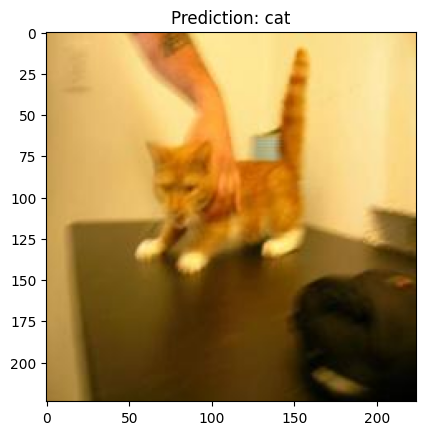

In [6]:
predict(catjson, catimg)

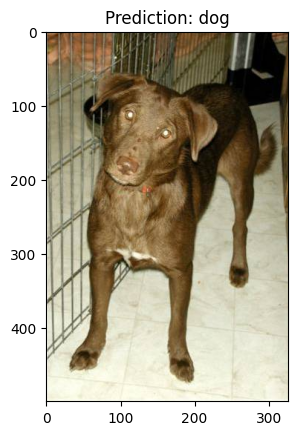

In [7]:
predict(dogjson, dogimg)

<h2>Part 2: Use this code to load images from a folder and generate predictions</h2>

In [ ]:
!pip install --quiet scikit-image

In [8]:
# imports
import sys
import glob
import base64
import json
import requests
from skimage import io
import matplotlib.pyplot as plt

<h4>Step 1: Setting up connection details to KServe and define image directory</h4>

In [9]:
# Set direcotry ./img/pred for images and get files with .jpg extention
images = r"./pred/*.jpg"

<h4>Step 2: Request prediction from KServe InferenceService and display results</h4>

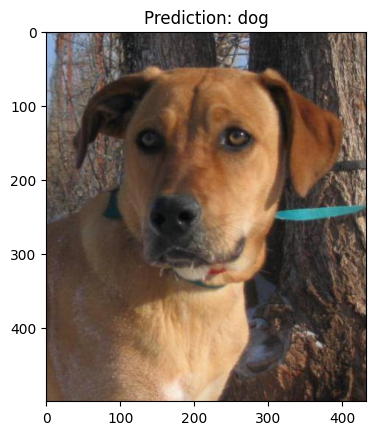

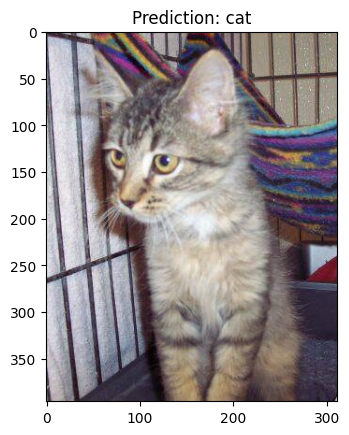

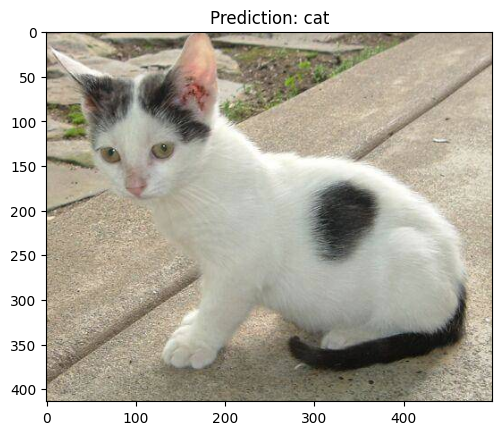

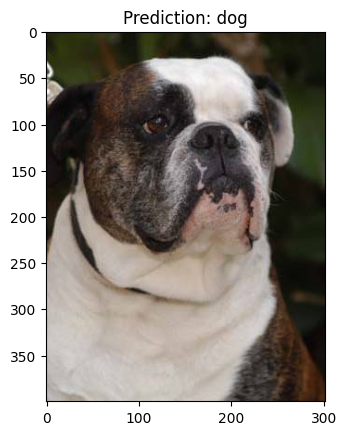

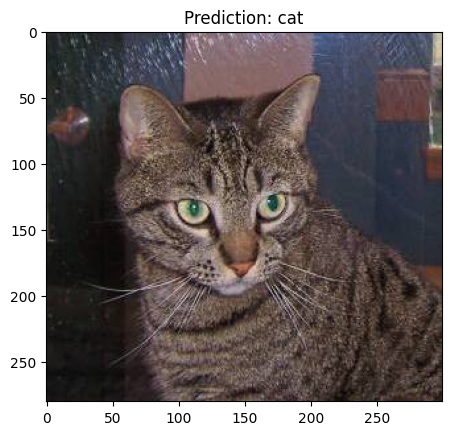

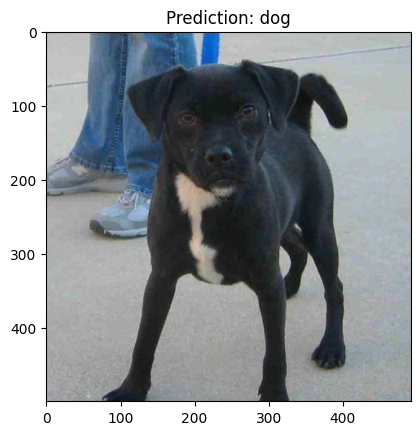

In [10]:
# Define classes to predict
class_list = ["dog", "cat"]

# loop over images, convert them to json and make prediction
for img in glob.glob(images, recursive=True):
    dis_image = io.imread(img)
    image = open(img, "rb") # Open binary file in read mode
    image_read = image.read()
    image_64_encode = base64.b64encode(image_read)
    bytes_array = image_64_encode.decode("utf-8")
    
    # Format the request in json
    request = {
      "instances":[
        {
          "data": bytes_array
        }
      ]
    }
    
    # Create request for Prediction (header, URL, payload)
    url = str("http://") + str(ingress_host) + ":" + str(ingress_port) + "/v1/models/" + str(model_name) + ":predict"
    headers = {'Host': service_hostname, "Content-Type" : "application/json"}
    payload = json.dumps(request)
    
    
    # Make prediction
    response = requests.post(url, data=payload, headers=headers)
    output = response.json()
    
    # Find correct class name
    pred_name = class_list[int(output["predictions"][0])]
    
    # Display image and prediction
    plt.imshow(dis_image)
    plt.title(f"Prediction: {pred_name}")
    plt.show()